# Preprocessing

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import torch

In [99]:
from src.vfm.connection import Connection
from src.vfm.preprocessor import Preprocessor
from src.vfm.resampler import Resampler
from src.vfm.model.nn.swt_tft import PhysicsInformedTftModel
import pandas as pd
from src.utils.descriptive_utils import *
from src.vfm.model.physics.physics_informed import PhysicsInformedHybridModel
from src.utils import *
import matplotlib.pyplot as plt

In [5]:
connection = Connection()
# Get client
client = connection.get_client()

In [6]:
df_all_wells = connection.get_data(client, wells=get_all_wells())
df_all_wells.columns

Index(['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test',
       'qg_well_test', 'qw_well_test', 'qo_mpfm', 'qg_mpfm', 'wc_mpfm',
       'well_id'],
      dtype='object')

In [7]:
dependent_vars=get_depdendent_vars()
independent_vars=get_independent_vars()

In [8]:
preprocessor = Preprocessor()
df_all_wells_preprocessed = preprocessor.preprocess_wells(df=df_all_wells)
len(df_all_wells_preprocessed)

Preprocessing well W06 with columns ['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test', 'qg_well_test', 'qw_well_test', 'qo_mpfm', 'qg_mpfm', 'wc_mpfm', 'well_id']
Preprocessing well W08 with columns ['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test', 'qg_well_test', 'qw_well_test', 'qo_mpfm', 'qg_mpfm', 'wc_mpfm', 'well_id']
Preprocessing well W10 with columns ['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test', 'qg_well_test', 'qw_well_test', 'qo_mpfm', 'qg_mpfm', 'wc_mpfm', 'well_id']
Preprocessing well W11 with columns ['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test', 'qg_well_test', 'qw_well_test', 'qo_mpfm', 'qg_mpfm', 'wc_mpfm', 'well_id']
Preprocessing well W15 with columns ['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test', 'qg_well_test', 'qw_well_test', 'qo_mpfm', 'qg_mpfm', 'wc_mpfm', 'well_id']
Preprocessing well W18 with columns ['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test', 'qg_well_test', 'qw_well_test', 'qo_mp

729

In [9]:
summarize_null(df_all_wells_preprocessed)

qo_mpfm      0
qg_mpfm      0
qw_mpfm      0
well_code    0
dhp          0
dht          0
whp          0
wht          0
choke        0
dcp          0
well_id      0
wc_mpfm      0
dtype: int64

In [25]:
df_train, df_val, df_test = get_random_train_test_split_per_well_with_order_preserved(df=df_all_wells_preprocessed, test_size=0.2)
len(df_train), len(df_val), len(df_test)

(515, 65, 149)

In [26]:
model = PhysicsInformedHybridModel(dependant_vars=dependent_vars, independent_vars=independent_vars)
model.fit(df=df_train, df_val=df_val)

[Validation] Residual RMSE = 0.2560


In [27]:
model.score_physics(df_test)

{'W06': {'qo': {'r2': 0.4734229811771351,
   'mae': 17.700397131005055,
   'rmse': 24.026604547989276,
   'mape (%)': 21.249916974227435,
   'mpe (%)': 11.777876389618736},
  'qw': {'r2': 0.026256116161269993,
   'mae': 0.13128593779373154,
   'rmse': 0.15501371080558088,
   'mape (%)': 162754.7660651487,
   'mpe (%)': 162731.27350232517},
  'qg': {'r2': 0.7995230129076278,
   'mae': 1554.617468640062,
   'rmse': 1876.2854464170068,
   'mape (%)': 11.019717307180077,
   'mpe (%)': -5.558470856853727},
  'wgr': {'r2': -0.42763820797761776,
   'mae': 8.627141700828552e-06,
   'rmse': 1.0470832057582007e-05,
   'mape (%)': 74.76692855986492,
   'mpe (%)': 9.08108086908828},
  'gor': {'r2': -21.57113343891962,
   'mae': 14.117124873468526,
   'rmse': 26.53225013509626,
   'mape (%)': 11.30919552090611,
   'mpe (%)': -9.555503792510848}},
 'W08': {'qo': {'r2': -1.3082457749143641,
   'mae': 5.85733730193862,
   'rmse': 8.312403612152144,
   'mape (%)': 26.26448173665765,
   'mpe (%)': 16.43

In [28]:
model.score_hybrid(df_test)

{'W06': {'qo': {'r2': 0.8057539301336365,
   'mae': 10.867985260716178,
   'rmse': 14.592764371142792,
   'mape (%)': 8.941638899519395,
   'mpe (%)': -0.718569170396989},
  'qw': {'r2': -0.3415739113454186,
   'mae': 0.09181002121982354,
   'rmse': 0.18195124998127388,
   'mape (%)': 100.0,
   'mpe (%)': -100.0},
  'qg': {'r2': 0.8393687117013784,
   'mae': 1234.771793720667,
   'rmse': 1679.5066113770797,
   'mape (%)': 9.389569208963303,
   'mpe (%)': -0.12389455835362415},
  'wgr': {'r2': -2.8959596200715776,
   'mae': 1.4913114891582548e-05,
   'rmse': 1.7297340562356382e-05,
   'mape (%)': 100.0,
   'mpe (%)': -100.0},
  'gor': {'r2': -4.810046060947615,
   'mae': 10.875049315898352,
   'rmse': 13.461305686470482,
   'mape (%)': 8.84741792227123,
   'mpe (%)': 1.0649674373234659}},
 'W08': {'qo': {'r2': -0.35655879030452065,
   'mae': 5.419344178120444,
   'rmse': 6.372427566976329,
   'mape (%)': 23.06852008470577,
   'mpe (%)': -2.707984544242803},
  'qw': {'r2': 0.805330498268

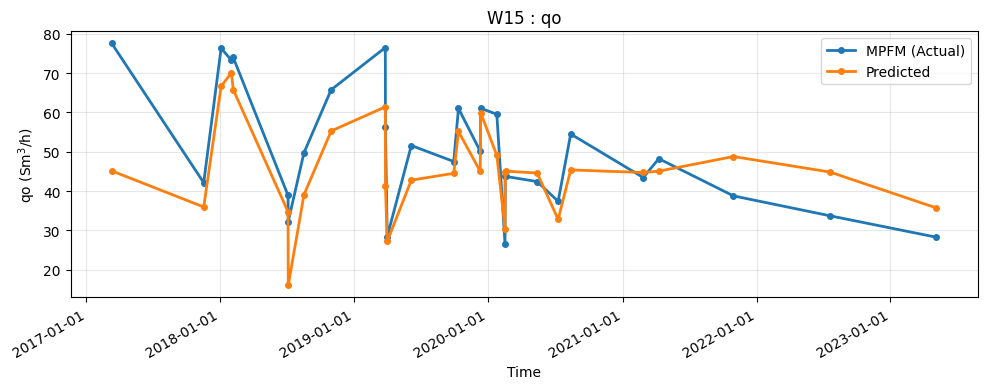

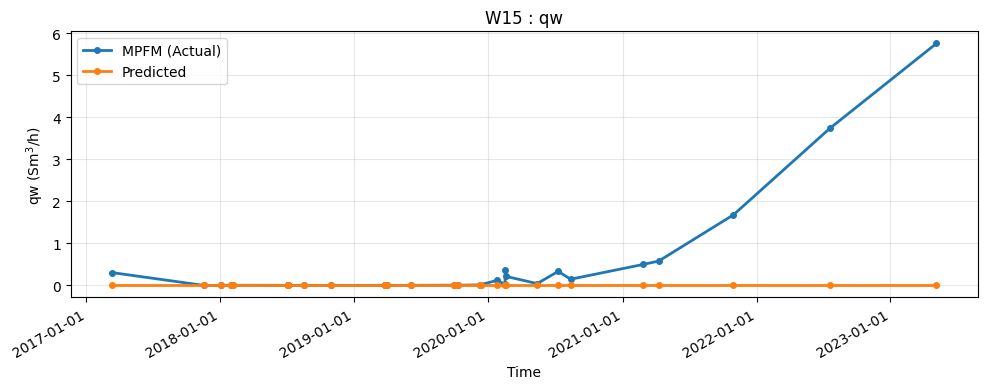

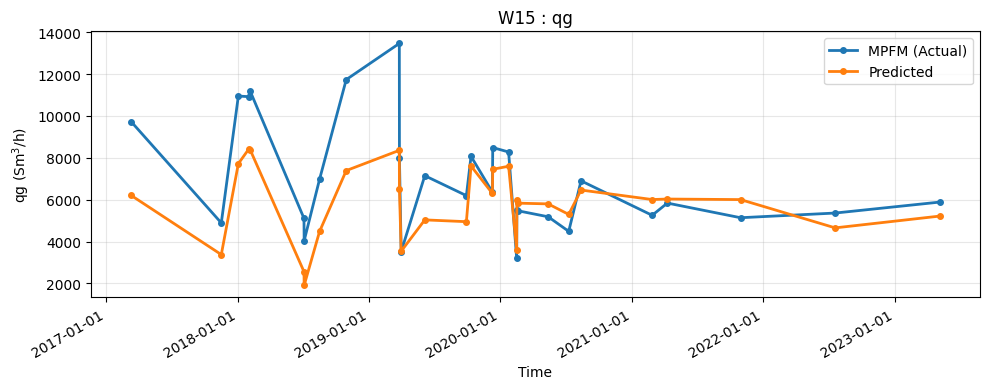

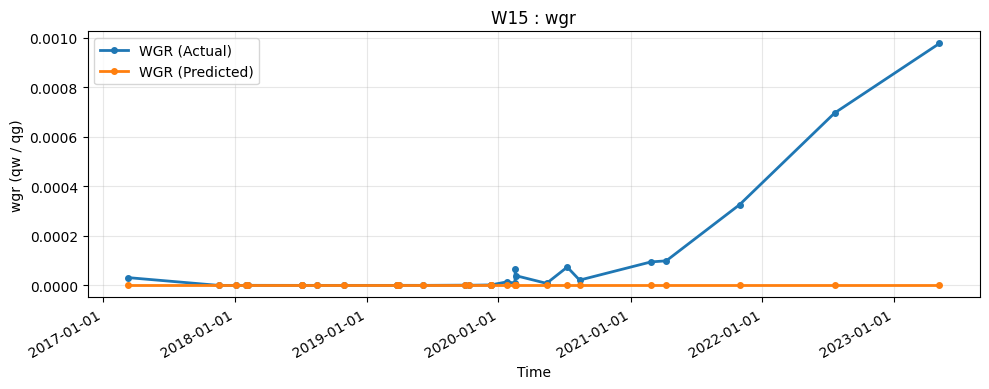

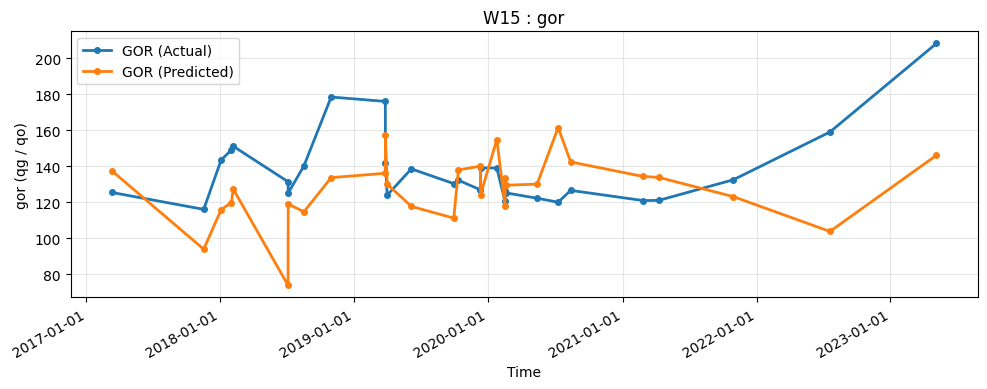

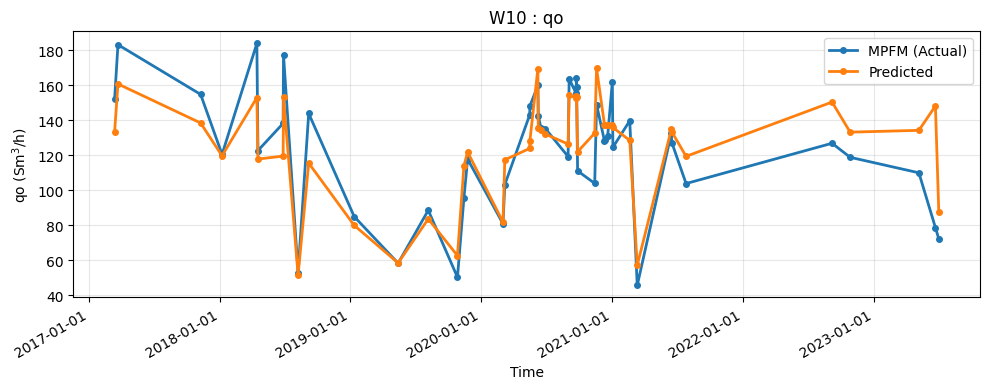

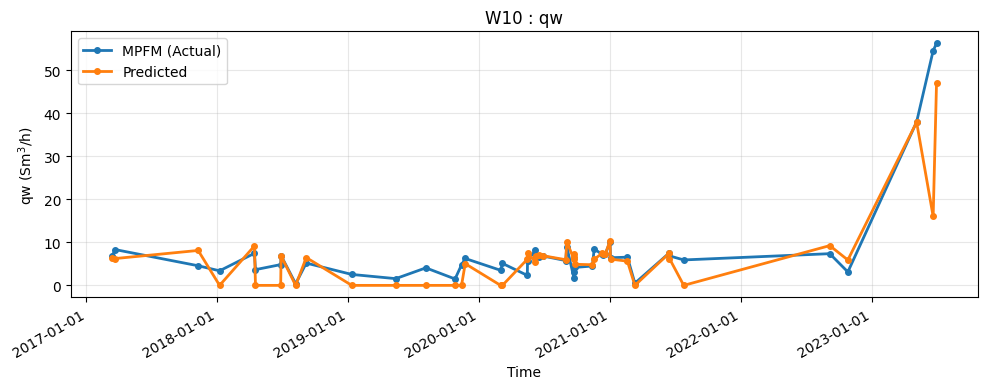

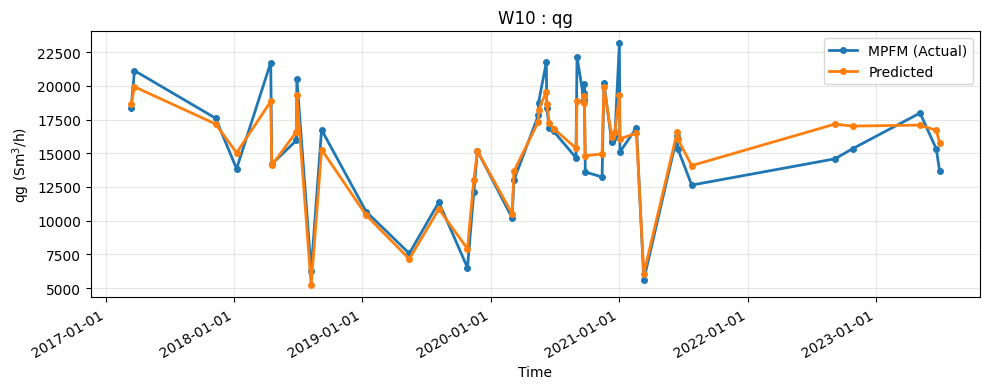

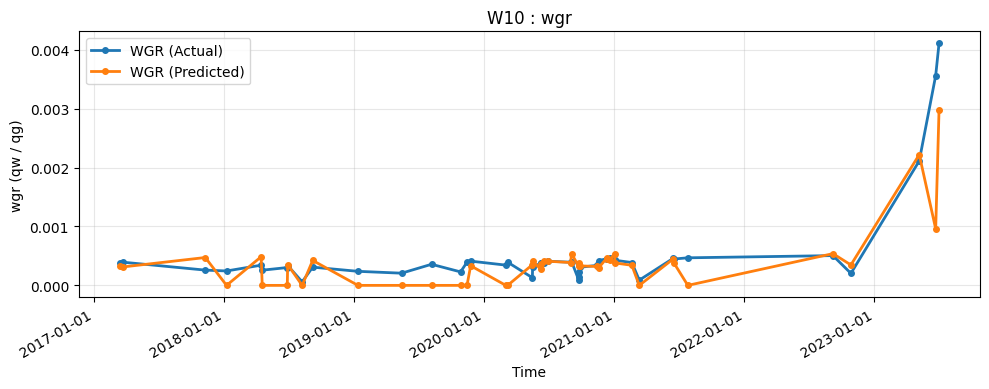

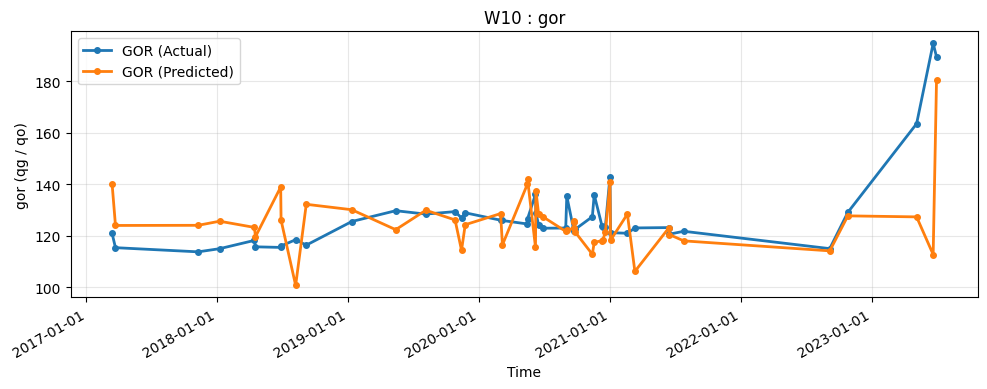

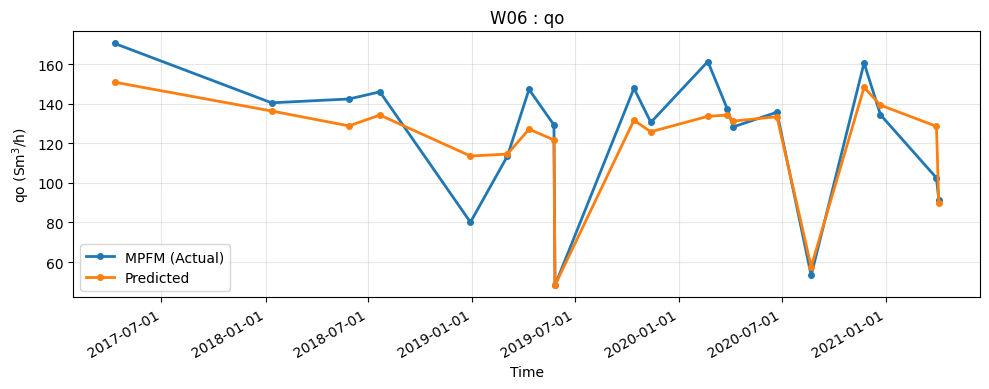

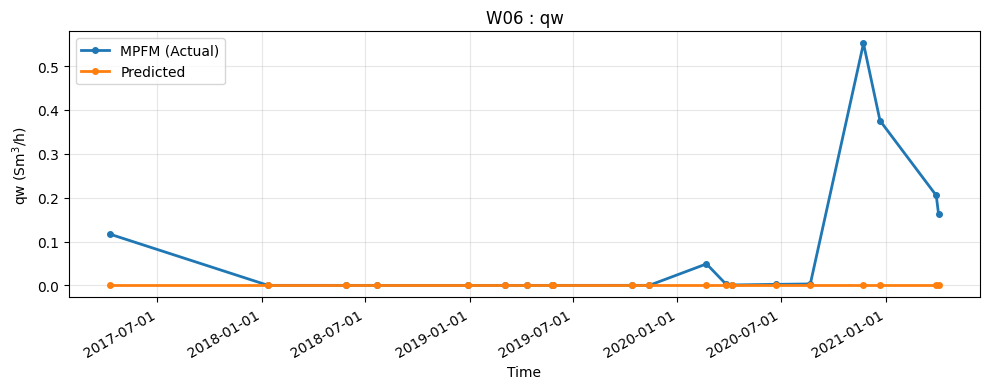

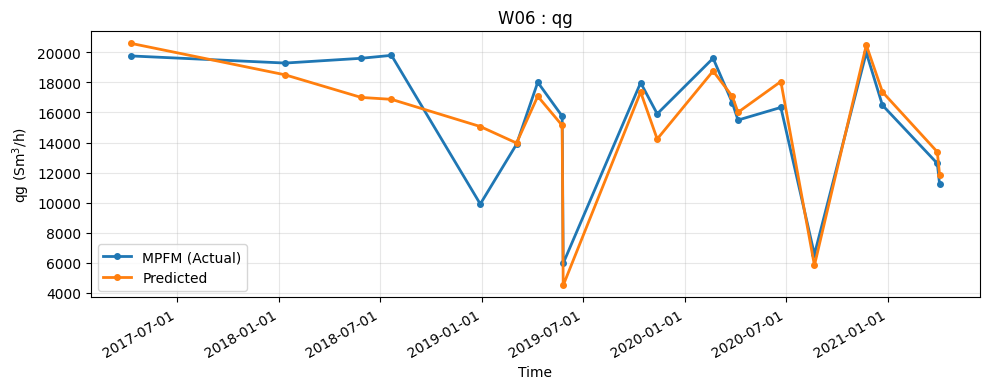

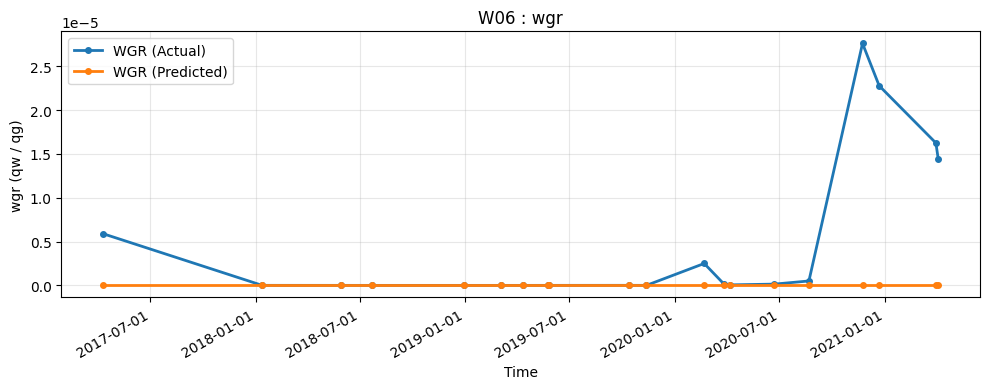

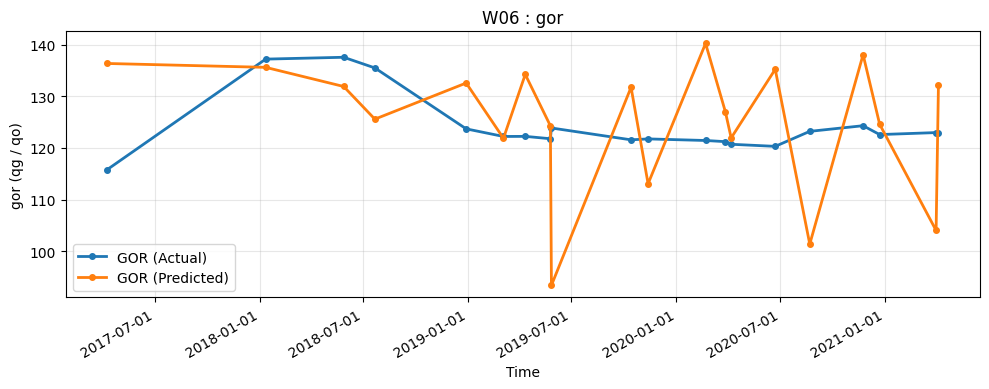

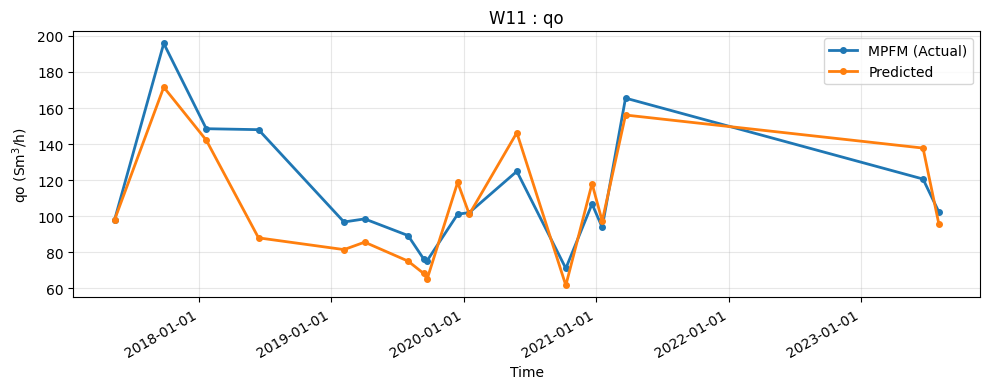

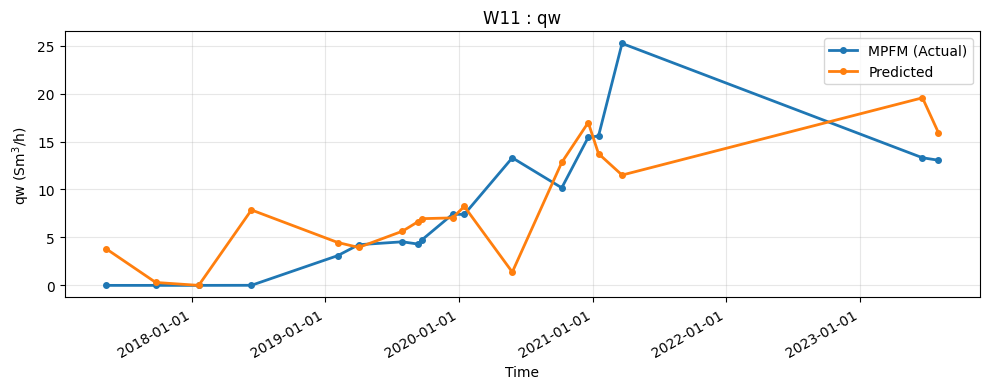

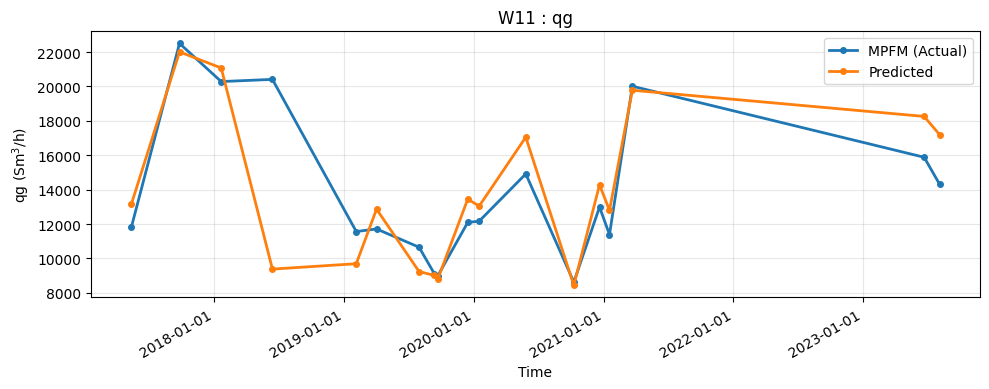

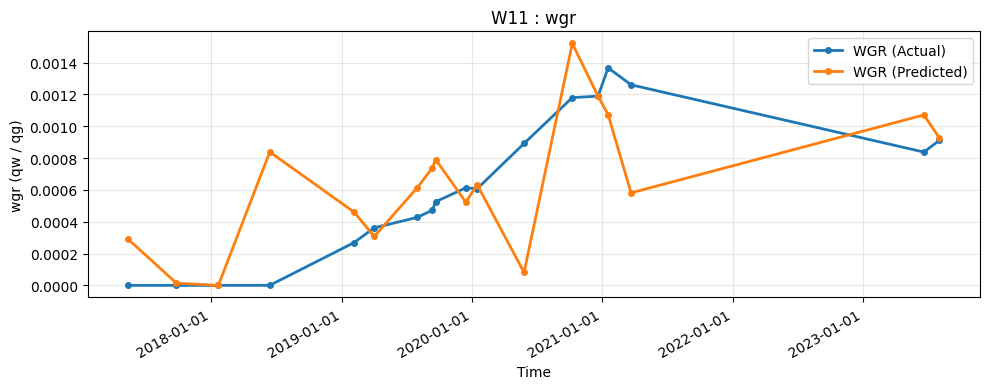

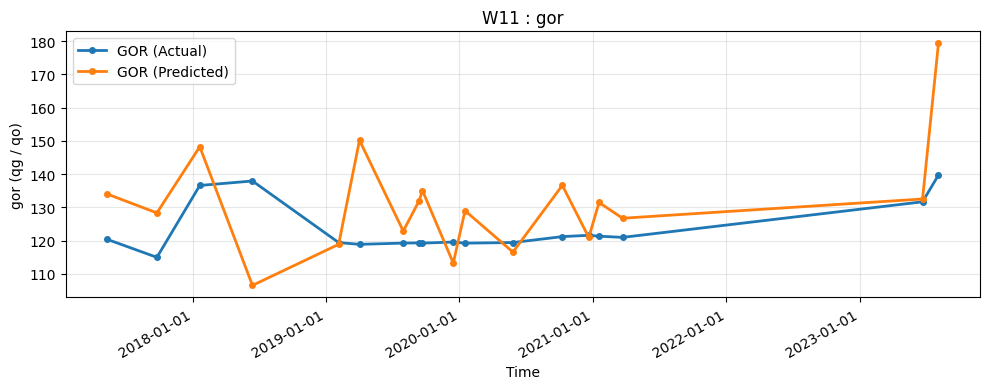

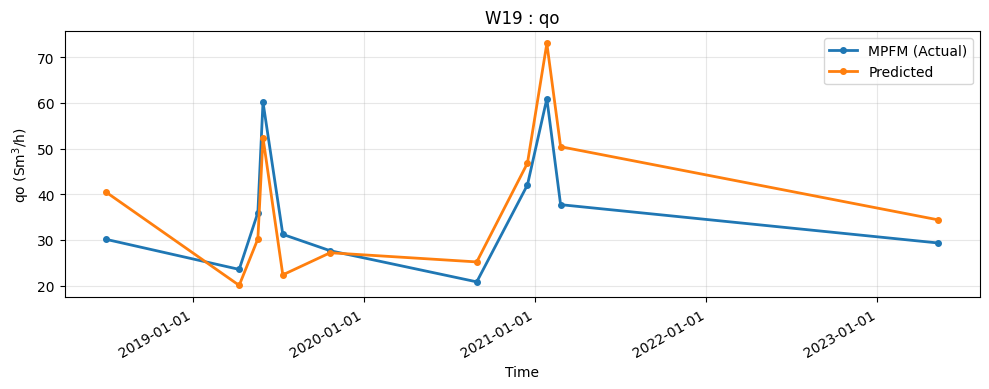

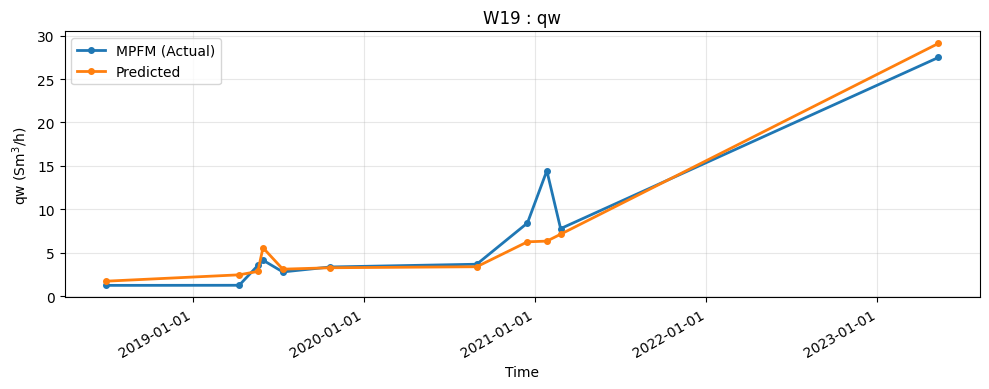

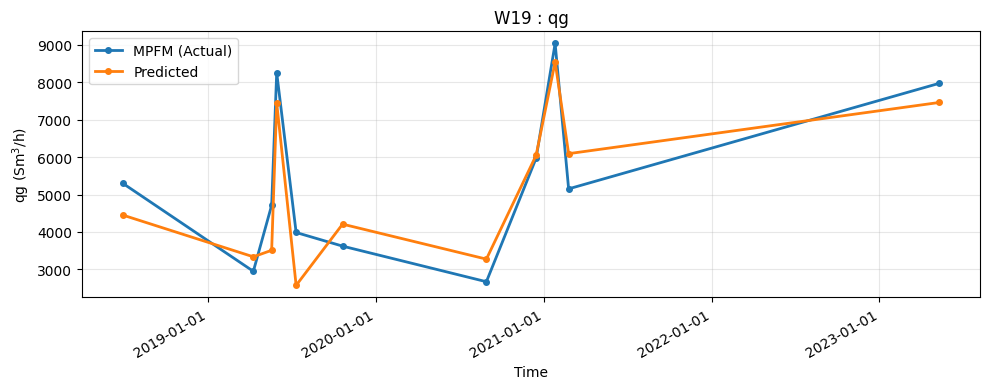

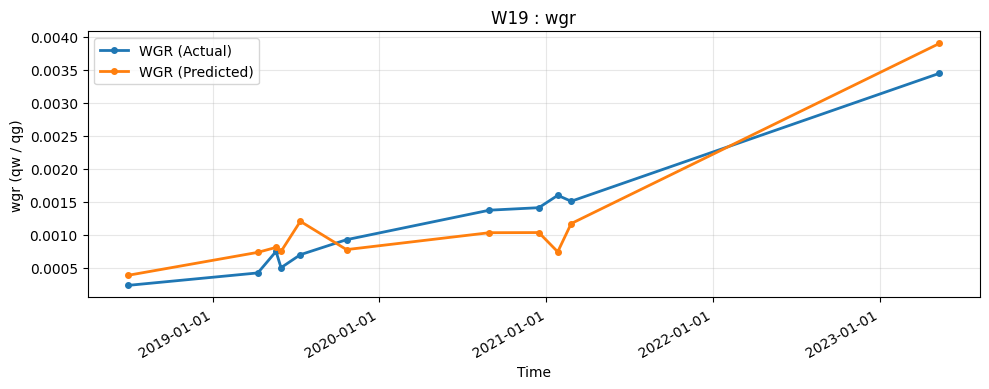

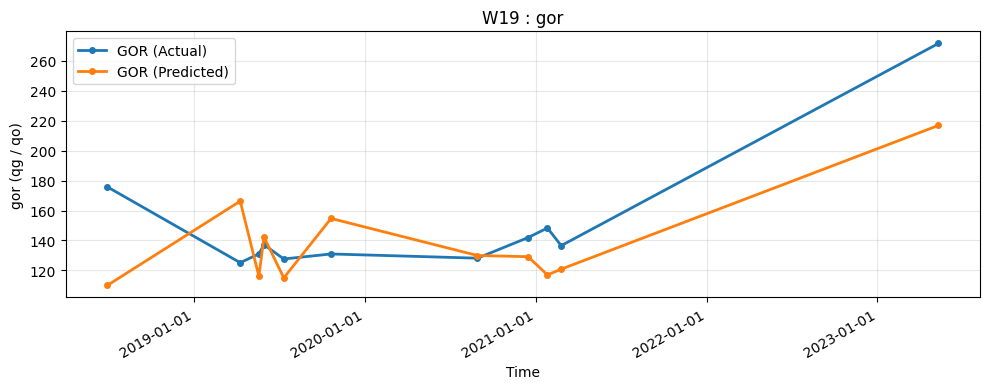

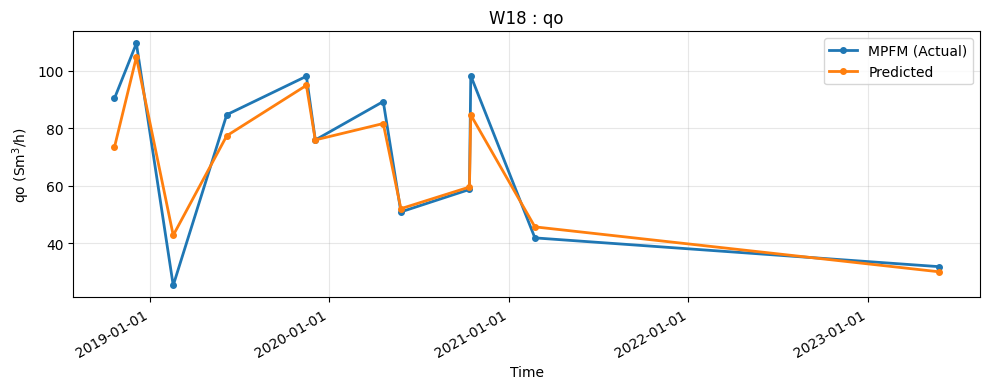

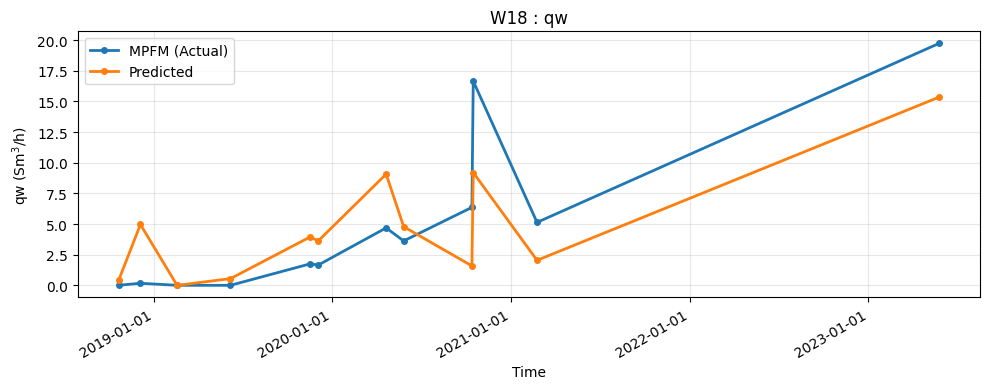

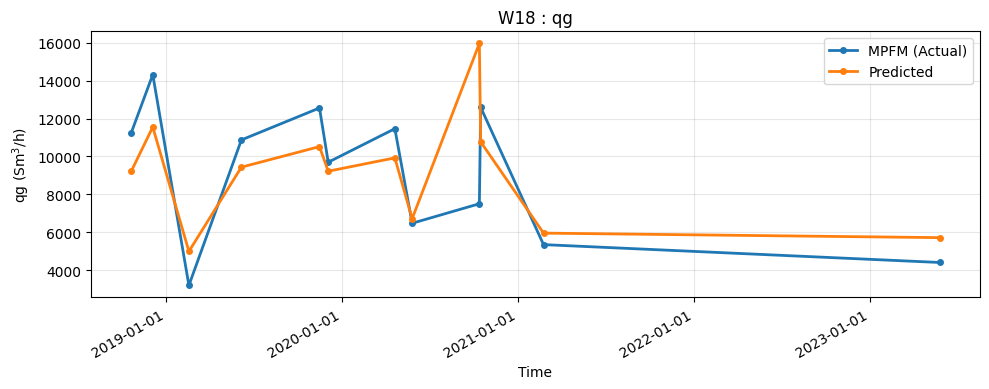

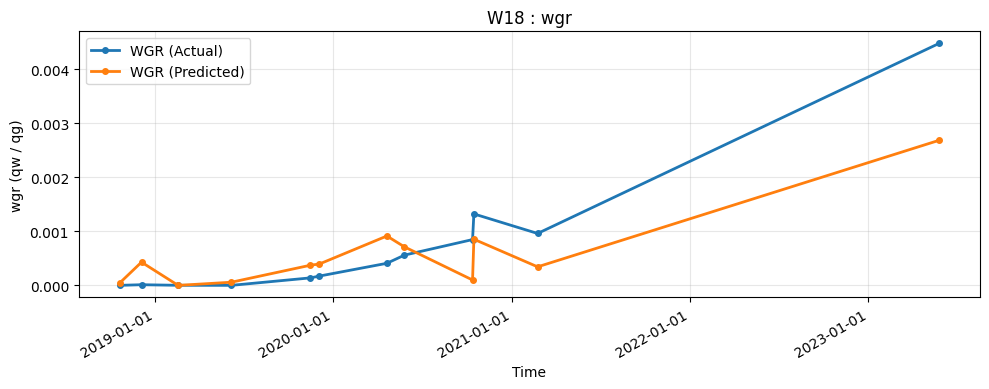

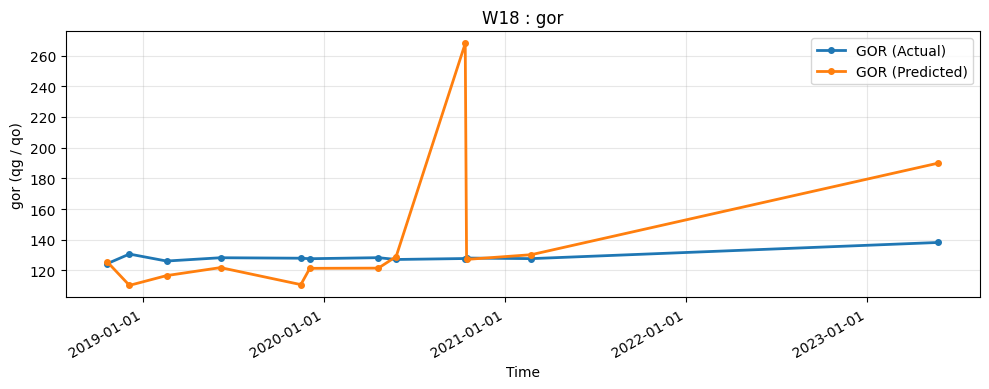

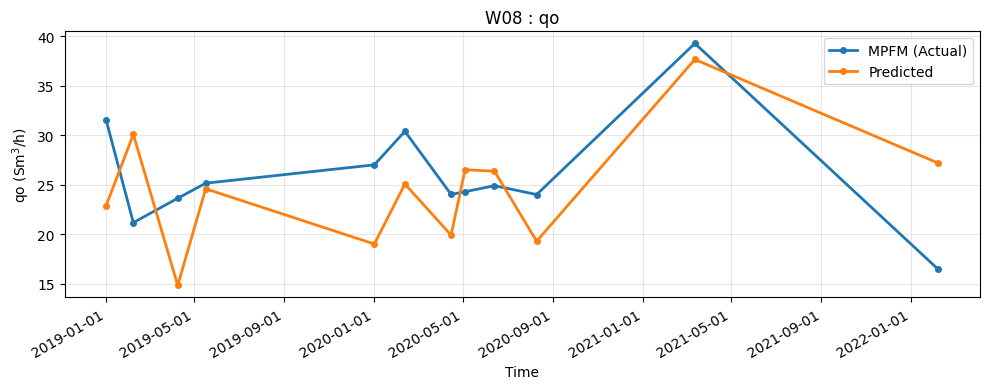

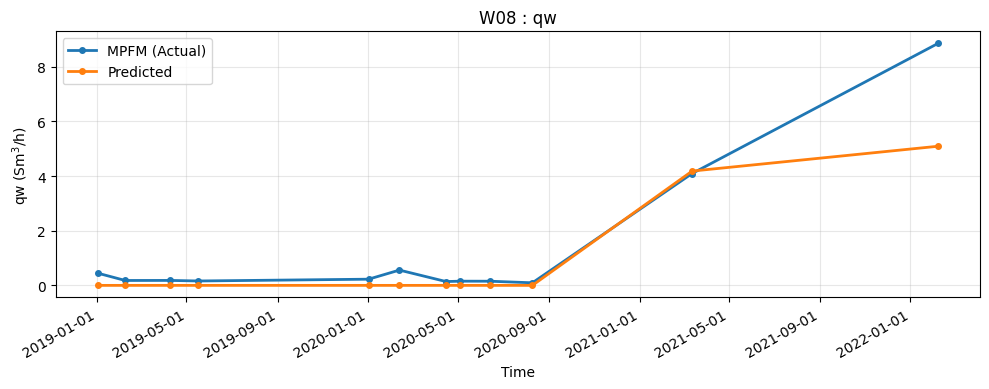

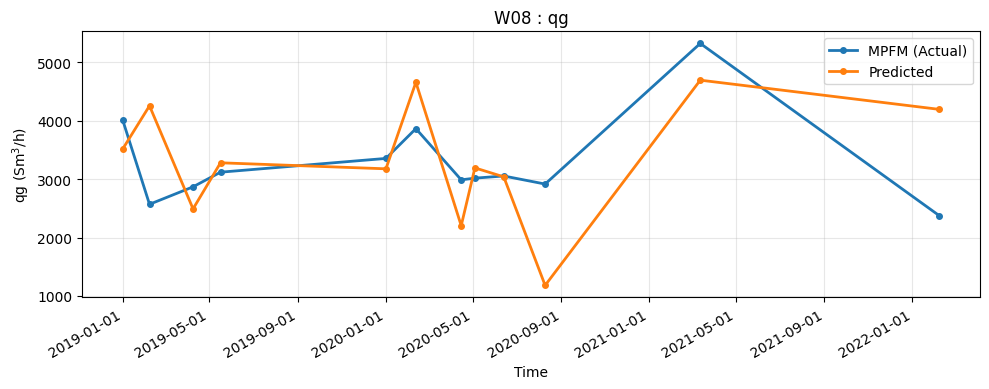

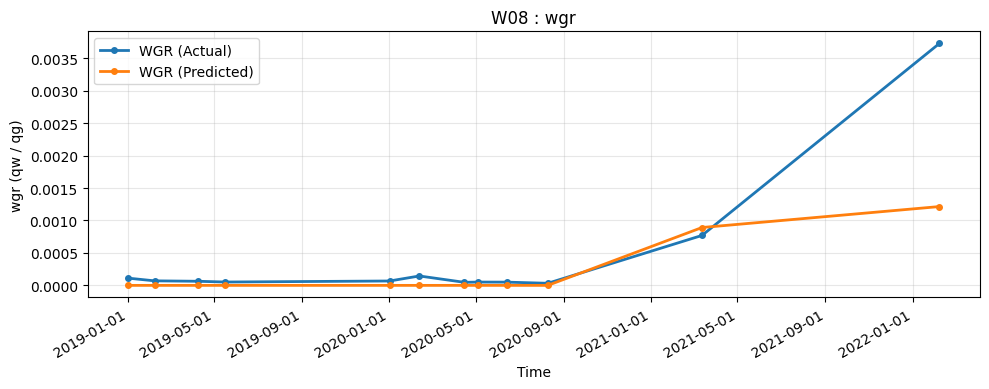

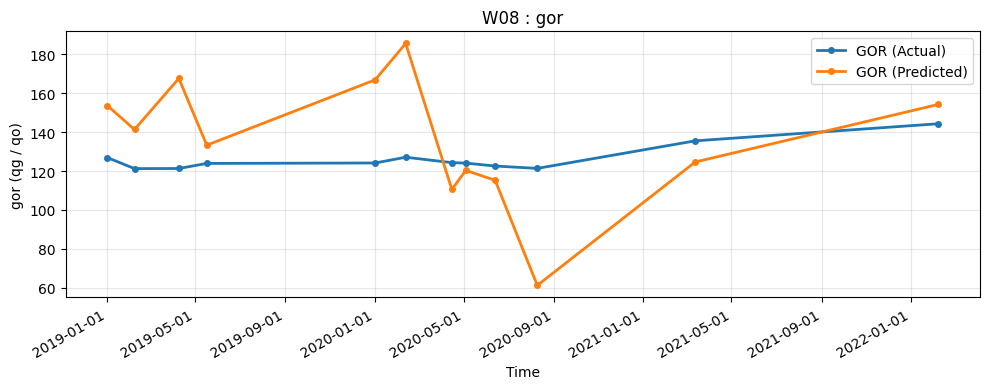

In [29]:
model.plot_predictions(df=df_test, is_hybrid_model=True)

### Resample and interpolate

In [79]:
resampler = Resampler()
df_resampled = resampler.resample_wells(df=df_all_wells_preprocessed, independent_vars=independent_vars)
print(summarize_null(df=df_resampled))
print(df_resampled.shape)

choke                0
whp                  0
dcp                  0
dhp                  0
wht                  0
dht                  0
well_code            0
qo_mpfm        2054244
qg_mpfm        2054244
qw_mpfm        2054244
wc_mpfm        2054244
is_observed          0
well_id              0
time_idx             0
dtype: int64
(2054973, 14)


In [80]:
df_resampled.index

RangeIndex(start=0, stop=2054973, step=1)

In [81]:
df_resampled.columns

Index(['choke', 'whp', 'dcp', 'dhp', 'wht', 'dht', 'well_code', 'qo_mpfm',
       'qg_mpfm', 'qw_mpfm', 'wc_mpfm', 'is_observed', 'well_id', 'time_idx'],
      dtype='object')

In [82]:
df_resampled[df_resampled["is_observed"] == 1].shape

(729, 14)

In [ ]:
# Monotonic
df_resampled.groupby("well_id")["time_idx"].is_monotonic_increasing

well_id
W06    True
W08    True
W10    True
W11    True
W15    True
W18    True
W19    True
Name: time_idx, dtype: bool

In [87]:
df_generated = model.generate_dense_well_rates(df=df_resampled)

In [92]:
df_generated

,choke,whp,dcp,dhp,wht,dht,well_code,qo_mpfm,qg_mpfm,qw_mpfm,wc_mpfm,is_observed,well_id,time_idx
0,0.528083,41.730152,21.704721,140.802737,61.559255,81.667259,0.0,113.107685,13173.310831,0.157657,0.139193,1,W06,14614
1,5.000000,41.730152,21.704721,140.802737,61.555283,81.666081,0.0,135.834591,18343.899520,2.779527,NaN,0,W06,14617
2,5.000000,41.799677,21.727676,140.773992,61.550877,81.667261,0.0,135.885902,18344.770456,2.771946,NaN,0,W06,14637
3,5.000000,41.800037,21.751549,140.778633,61.548965,81.668782,0.0,135.890135,18344.629854,2.762309,NaN,0,W06,14657
4,5.000000,41.729885,21.705208,140.744923,61.547827,81.666022,0.0,135.916808,18345.651167,2.782484,NaN,0,W06,14677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054968,5.000000,24.110495,20.978196,103.000451,61.491219,76.621787,6.0,0.326461,8849.277550,93.490351,NaN,0,W19,6738217
2054969,5.000000,24.134038,20.943768,102.967858,61.496113,76.624371,6.0,0.322353,6423.767493,93.521624,NaN,0,W19,6738237
2054970,5.000000,24.174173,20.971084,102.954697,61.499814,76.626078,6.0,0.326409,8850.041720,93.534070,NaN,0,W19,6738257
2054971,0.870000,23.714792,20.734004,97.135123,59.003958,79.395365,6.0,28.037388,8919.588673,29.365769,51.157062,1,W19,6738258


In [93]:
summarize_null(df_generated)

choke                0
whp                  0
dcp                  0
dhp                  0
wht                  0
dht                  0
well_code            0
qo_mpfm              0
qg_mpfm              0
qw_mpfm              0
wc_mpfm        2054244
is_observed          0
well_id              0
time_idx             0
dtype: int64